In [1]:
! pip install tensorflow

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

textract 1.6.3 requires six==1.12.0, but you'll have six 1.15.0 which is incompatible.



  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=4caaf69932c80d3a3df0c3f14075e5cdf88569f64329391b19bb2e49fb8d4f86
  Stored in directory: c:\users\akish\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-win_amd64.whl size=33701 sha256=5c5ea0112317563a3f4991db2e3197c9c7d28b0db25659b834443e1601590b58
  Stored in directory: c:\users\akish\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: six
    Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.

In [3]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [4]:
train_labels = []
train_samples = []

for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)


Epoch 1/30
210/210 - 2s - loss: 0.6477 - accuracy: 0.5757
Epoch 2/30
210/210 - 0s - loss: 0.6155 - accuracy: 0.6514
Epoch 3/30
210/210 - 0s - loss: 0.5842 - accuracy: 0.7052
Epoch 4/30
210/210 - 0s - loss: 0.5523 - accuracy: 0.7519
Epoch 5/30
210/210 - 0s - loss: 0.5195 - accuracy: 0.7862
Epoch 6/30
210/210 - 0s - loss: 0.4865 - accuracy: 0.8238
Epoch 7/30
210/210 - 0s - loss: 0.4541 - accuracy: 0.8419
Epoch 8/30
210/210 - 0s - loss: 0.4235 - accuracy: 0.8724
Epoch 9/30
210/210 - 0s - loss: 0.3958 - accuracy: 0.8819
Epoch 10/30
210/210 - 0s - loss: 0.3710 - accuracy: 0.8929
Epoch 11/30
210/210 - 0s - loss: 0.3495 - accuracy: 0.9005
Epoch 12/30
210/210 - 0s - loss: 0.3312 - accuracy: 0.9114
Epoch 13/30
210/210 - 0s - loss: 0.3159 - accuracy: 0.9167
Epoch 14/30
210/210 - 0s - loss: 0.3033 - accuracy: 0.9181
Epoch 15/30
210/210 - 0s - loss: 0.2929 - accuracy: 0.9290
Epoch 16/30
210/210 - 0s - loss: 0.2845 - accuracy: 0.9314
Epoch 17/30
210/210 - 0s - loss: 0.2776 - accuracy: 0.9290
Epoch 

# Creating a validation set 

In [11]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, verbose=2)


Epoch 1/30
189/189 - 1s - loss: 0.2408 - accuracy: 0.9429 - val_loss: 0.2576 - val_accuracy: 0.9429
Epoch 2/30
189/189 - 0s - loss: 0.2402 - accuracy: 0.9434 - val_loss: 0.2574 - val_accuracy: 0.9429
Epoch 3/30
189/189 - 0s - loss: 0.2394 - accuracy: 0.9429 - val_loss: 0.2565 - val_accuracy: 0.9429
Epoch 4/30
189/189 - 0s - loss: 0.2386 - accuracy: 0.9407 - val_loss: 0.2562 - val_accuracy: 0.9429
Epoch 5/30
189/189 - 0s - loss: 0.2380 - accuracy: 0.9434 - val_loss: 0.2555 - val_accuracy: 0.9429
Epoch 6/30
189/189 - 0s - loss: 0.2375 - accuracy: 0.9450 - val_loss: 0.2543 - val_accuracy: 0.9429
Epoch 7/30
189/189 - 0s - loss: 0.2369 - accuracy: 0.9434 - val_loss: 0.2528 - val_accuracy: 0.9429
Epoch 8/30
189/189 - 0s - loss: 0.2366 - accuracy: 0.9434 - val_loss: 0.2534 - val_accuracy: 0.9429
Epoch 9/30
189/189 - 0s - loss: 0.2362 - accuracy: 0.9434 - val_loss: 0.2532 - val_accuracy: 0.9429
Epoch 10/30
189/189 - 0s - loss: 0.2357 - accuracy: 0.9434 - val_loss: 0.2530 - val_accuracy: 0.9429

# test data creation

In [12]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [13]:
predict = model.predict(x= scaled_test_samples, batch_size=10, verbose=0)

In [14]:
for i in predict:
    print(i)

[0.9755593  0.02444065]
[0.0158186 0.9841814]
[0.9767303  0.02326968]
[0.975749   0.02425093]
[0.05529352 0.94470644]
[0.08260883 0.9173911 ]
[0.25638592 0.7436141 ]
[0.9246857  0.07531427]
[0.29856956 0.7014304 ]
[0.10046976 0.89953023]
[0.25638592 0.7436141 ]
[0.04064754 0.9593525 ]
[0.9765845  0.02341555]
[0.12274209 0.8772578 ]
[0.8682109 0.1317891]
[0.9767512  0.02324882]
[0.09114644 0.90885353]
[0.9768901  0.02310995]
[0.9767303  0.02326968]
[0.97490066 0.02509937]
[0.97608054 0.02391945]
[0.01279246 0.9872075 ]
[0.01422646 0.9857736 ]
[0.6967007  0.30329925]
[0.54970473 0.45029527]
[0.97624755 0.02375249]
[0.03664941 0.96335053]
[0.3934865  0.60651356]
[0.9759058  0.02409417]
[0.6504269  0.34957314]
[0.13715011 0.86284995]
[0.8682109 0.1317891]
[0.96369725 0.03630274]
[0.54970473 0.45029527]
[0.04064754 0.9593525 ]
[0.9246857  0.07531427]
[0.13715011 0.86284995]
[0.6011349  0.39886513]
[0.8121121 0.1878879]
[0.02413124 0.97586876]
[0.96369725 0.03630274]
[0.6504269  0.34957314]


In [15]:
rounded_predictions = np.argmax(predict, axis=-1)

In [16]:
rounded_predictions

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [17]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [18]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [19]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[196  14]
 [ 10 200]]


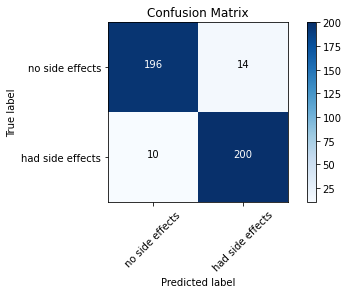

In [20]:
cm_plot_labels = ['no side effects', 'had side effects']
plot_confusion_matrix(cm , cm_plot_labels, title='Confusion Matrix')

# saving model keras

In [21]:
import os.path
if os.path.isfile('models/medical_train_model.h5') is False:
    model.save('models/medical_train_model.h5')

# calling a saved model

In [22]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_train_model.h5')

In [23]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [26]:
new_model.optimizer

In [28]:
new_model.get_weights()


[array([[ 0.76460797,  0.35020918,  0.4975256 ,  0.5056271 , -0.28207117,
         -0.14149868,  0.51741034,  0.47181365,  0.4745398 ,  0.00330728,
         -0.11058256, -0.02661705,  0.32607687,  0.33931696, -0.01568417,
         -0.2698907 ]], dtype=float32),
 array([-0.14150336, -0.1508391 , -0.14730987,  0.21395348,  0.        ,
         0.        , -0.17292495, -0.15971936, -0.13698006, -0.0034997 ,
         0.        ,  0.        , -0.13118151, -0.14302318,  0.19560422,
         0.        ], dtype=float32),
 array([[ 0.02444698, -0.30321956, -0.00443742,  0.28237274,  0.02805287,
         -0.2890944 , -0.47498274, -0.2329671 ,  0.15470318,  0.10806578,
         -0.11987507,  0.37846676,  0.07431003,  0.13717629, -0.2739766 ,
         -0.21109775, -0.11177285, -0.11295592, -0.10630059,  0.10921159,
         -0.28667164,  0.279856  ,  0.16674837,  0.16961597, -0.10335907,
          0.12941435,  0.47694588,  0.2938791 , -0.28242704,  0.4818288 ,
         -0.30214182, -0.14873065],
 

# save model using JSON

In [30]:
json_string = model.to_json()#model.to_yaml()

In [31]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [32]:
from tensorflow.keras.models import model_from_json#model_form_yaml
model_arch = model_from_json(json_string)

In [33]:
model_arch.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# save weights only 

In [34]:
import os.path
if os.path.isfile('models/medical_train_model_weights.h5') is False:
    model.save_weights('models/medical_train_model_weights.h5')

In [35]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [36]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
